In [141]:
# part 1 
from pandas import Series 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
wineQuality = pd.read_csv("winequality-red.csv")

print wineQuality.info()

print wineQuality.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
m

In [142]:
#Part 2 
#Splitting THE DATA UP INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split
xprep = wineQuality.drop('quality',1) 
x_train, x_cv, y_train, y_cv = train_test_split(xprep,wineQuality.quality, test_size =0.3)

from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV()
encv.fit(x_train, y_train)


ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

Training RMSEA: 0.6354814417447219
Testing RMSEA: 0.700309109133248
difference = 0.06482766738852608


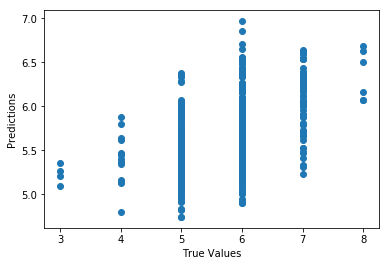

In [143]:
predictions = encv.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)

#and here's how accurate on the testing data
predictions = encv.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


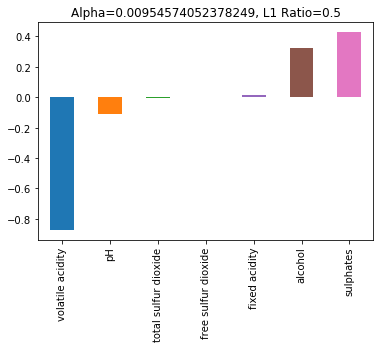

In [144]:
predictors = x_train.columns
coef = Series(encv.coef_,predictors).sort_values()
coef=coef[coef!=0]
print coef.plot(kind='bar', title='Alpha='+str(encv.alpha_)+', L1 Ratio='+str(encv.l1_ratio_))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22584290>


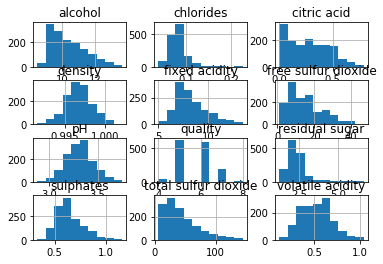

In [145]:
from scipy import stats 
outliersWQ = wineQuality[(np.abs(stats.zscore(wineQuality)) <= 3).all(axis=1)]
print outliersWQ.hist()

In [146]:
from sklearn.model_selection import train_test_split
xprep = outliersWQ.drop('quality',1) 
x_train, x_cv, y_train, y_cv = train_test_split(xprep,outliers.quality, test_size =0.3)

from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV()
encv.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

Training RMSEA: 0.6253247697880134
Testing RMSEA: 0.6285025773518764
difference = 0.003177807563862989


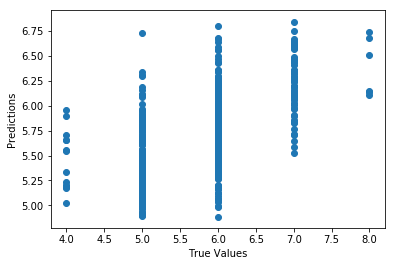

In [147]:
#4 
predictions = encv.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)

#and here's how accurate on the testing data
predictions = encv.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


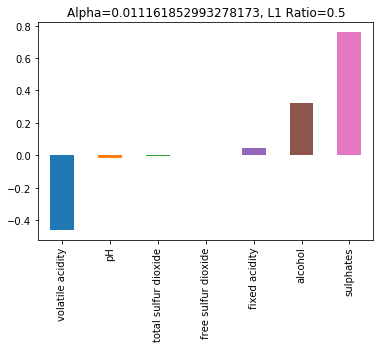

In [148]:
predictors = x_train.columns
coef = Series(encv.coef_,predictors).sort_values()
coef=coef[coef!=0]
print coef.plot(kind='bar', title='Alpha='+str(encv.alpha_)+', L1 Ratio='+str(encv.l1_ratio_))

In [149]:
# This just helps me read the data 
#Training RMSEA: 0.6213951028009518
#Testing RMSEA: 0.6334051803942151
#difference = 0.012010077593263335

#Training RMSEA: 0.6586700142372149
#Testing RMSEA: 0.6503579665348002
#difference = -0.008312047702414782 
#^^^^^^^ this is the orginal 

# Our RMSE went down by .02 for the testing RMSE and 
# the training RMSE went down by .03. 
# The gap between our RMSE actually went up when we took out our outliers. 


SyntaxError: invalid syntax (<ipython-input-149-3e5f451c2273>, line 1)

In [ ]:
print outliersWQ["volatile acidity"].hist()

In [ ]:
print outliersWQ["pH"].hist()

In [ ]:
print outliersWQ["total sulfur dioxide"].hist()

In [ ]:
outliersWQ["log total Sulfur Dioxide"]= np.log(outliersWQ["total sulfur dioxide"])
print outliersWQ["log total Sulfur Dioxide"].hist() 

In [ ]:
outliersWQ["free sulfur dioxide"].hist()

In [ ]:
outliersWQ["log free Sulfur Dioxide"]= np.log(outliersWQ["free sulfur dioxide"])
print outliersWQ["log free Sulfur Dioxide"].hist() 

In [ ]:
outliersWQ["fixed acidity"].hist()

In [ ]:
outliersWQ["alcohol"].hist()

In [ ]:
outliersWQ["log alcohol"]= np.log(outliersWQ["alcohol"])
print outliersWQ["log alcohol"].hist() 

In [ ]:
outliersWQ["sulphates"].hist()

In [ ]:
outliersWQ["log sulphates"]= np.log(outliersWQ["sulphates"])
print outliersWQ["log sulphates"].hist() 

In [150]:
outliersWQ.drop(["total sulfur dioxide","free sulfur dioxide","alcohol","sulphates"], axis =1 ,inplace = True)
print outliersWQ.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 8 columns):
fixed acidity       1451 non-null float64
volatile acidity    1451 non-null float64
citric acid         1451 non-null float64
residual sugar      1451 non-null float64
chlorides           1451 non-null float64
density             1451 non-null float64
pH                  1451 non-null float64
quality             1451 non-null int64
dtypes: float64(7), int64(1)
memory usage: 102.0 KB
None


In [151]:
#6
from sklearn.model_selection import train_test_split
xprep = outliersWQ.drop('quality',1) 
x_train, x_cv, y_train, y_cv = train_test_split(xprep,outliers.quality, test_size =0.3)

from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV()
encv.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

Training RMSEA: 0.7061956111228228
Testing RMSEA: 0.7681165349458797
difference = 0.06192092382305692


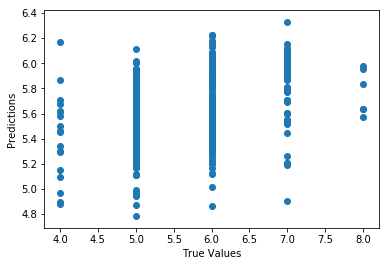

In [152]:
predictions = encv.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)

#and here's how accurate on the testing data
predictions = encv.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [153]:
#Training RMSEA: 0.6586700142372149
#Testing RMSEA: 0.6503579665348002
#difference = -0.008312047702414782 
#Original values ^^^^ 

# The training RMSE actually went up after the transformations to the 
# the skewed data. The training RMSE wen tup by .05 and the testing 
# RMSE went up by .11. The difference between the data in training RMSE and testing went up 
# doing the transformations. 

In [ ]:
#The aspects that most affected the quality of the wine in a positive way was 
#sulphates, alchol and fixed acidity. While volatile acidity actually 
# decreased the quality of the wine. 

#"Our model appears to be accurate to within __0.06192092382305692______________" by using the 
#value of the testing RMSE and the units of the dependent variable